In [11]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np
# Pillow
from PIL import Image
# Torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms

In [12]:
size = (150, 150)
groups = ['train', 'test', 'val']
classes = {0: 'normal', 1: 'non-covid', 2:"covid"}

dataset_numbers = {'train_normal': 1340,\
                   'train_non-covid': 2529,\
                   'train_covid':1344,\
                   'val_normal': 7,\
                   'val_non-covid': 7,\
                   'val_covid': 8,\
                   'test_normal': 233,\
                   'test_non-covid': 241,\
                   'test_covid': 138}
print(dataset_numbers)

{'train_normal': 1340, 'train_non-covid': 2529, 'train_covid': 1344, 'val_normal': 7, 'val_non-covid': 7, 'val_covid': 8, 'test_normal': 233, 'test_non-covid': 241, 'test_covid': 138}


In [13]:
dataset_paths = {'train_normal': './dataset/train/normal/',\
                 'train_non-covid': './dataset/train/infected/non-covid/',\
                 'train_covid': './dataset/train/infected/covid/',\
                 'val_normal': './dataset/val/normal/',\
                 'val_non-covid': './dataset/val/infected/non-covid/',\
                 'val_covid': './dataset/val/infected/covid/',\
                 'test_normal': './dataset/test/normal/',\
                 'test_non-covid': './dataset/test/infected/non-covid/',\
                 'test_covid': './dataset/test/infected/covid/'}
print(dataset_paths)

{'train_normal': './dataset/train/normal/', 'train_non-covid': './dataset/train/infected/non-covid/', 'train_covid': './dataset/train/infected/covid/', 'val_normal': './dataset/val/normal/', 'val_non-covid': './dataset/val/infected/non-covid/', 'val_covid': './dataset/val/infected/covid/', 'test_normal': './dataset/test/normal/', 'test_non-covid': './dataset/test/infected/non-covid/', 'test_covid': './dataset/test/infected/covid/'}


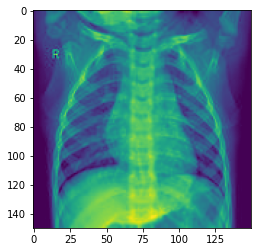

In [14]:
# Try to see some images
# Normal
path_to_file = dataset_paths['train_normal'] + "1.jpg"
with open(path_to_file, 'rb') as f:
    im = np.asarray(Image.open(f))
    plt.imshow(im)
f.close()

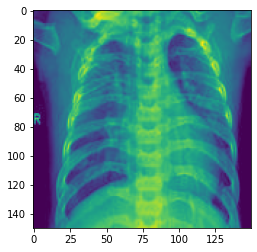

In [15]:
# Infected, Non-covid
path_to_file = dataset_paths['train_non-covid'] + "1.jpg"
with open(path_to_file, 'rb') as f:
    im = np.asarray(Image.open(f))
    plt.imshow(im)
f.close()

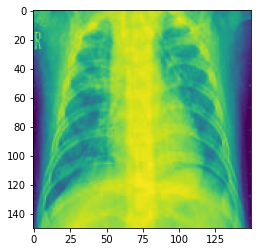

In [16]:
# Infected, Covid
path_to_file = dataset_paths['train_covid'] + "1.jpg"
with open(path_to_file, 'rb') as f:
    im = np.asarray(Image.open(f))
    plt.imshow(im)
f.close()

In [17]:
print(im)


[[141 146 145 ...  86  85  84]
 [148 147 143 ...  81  79  79]
 [150 142 137 ...  79  76  75]
 ...
 [ 39  58  75 ...  38  24  12]
 [ 41  62  76 ...  41  26  13]
 [ 40  66  77 ...  43  27  13]]


In [18]:
from utils import Lung_Dataset

In [19]:
train_set = Lung_Dataset("train")
test_set = Lung_Dataset("test")
val_set = Lung_Dataset("val")

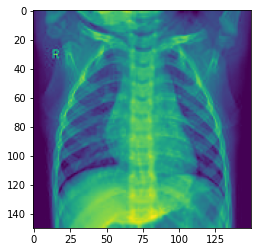

In [20]:
train_set.show_img("normal", 1)

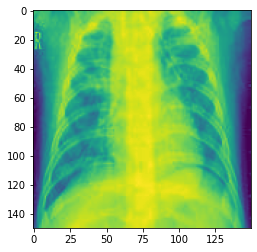

In [21]:
train_set.show_img("covid", 1)

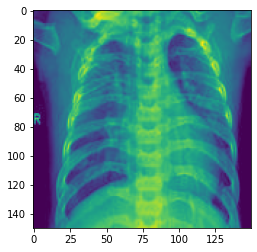

In [22]:
train_set.show_img("non-covid", 1)